In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy import stats

np.random.seed(42)

# Simulate typical user behavior patterns
normal_data = np.random.normal(50, 15, 800)

# Add natural skew (common in revenue, pageviews, etc.)
skewed_data = np.random.exponential(2, 800) * 10 + 20

# Include inevitable extreme outliers
outliers = [200, 180, 190, 210, 195]

# Combine into one messy dataset
data = np.concatenate([normal_data, skewed_data, outliers])
df = pd.DataFrame({'original': data})

# Apply all three scalers
scalers = {
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler(),
    'Robust': RobustScaler()
}

for name, scaler in scalers.items():
    df[name] = scaler.fit_transform(df[['original']]).flatten()

# Check what we're working with
print("Original Data Stats:")
print(f"Mean: {df['original'].mean():.2f}")
print(f"Median: {df['original'].median():.2f}")
print(f"Std Dev: {df['original'].std():.2f}")
print(f"Skewness: {stats.skew(df['original']):.2f}")
print(f"Range: {df['original'].min():.1f} to {df['original'].max():.1f}")


Original Data Stats:
Mean: 45.65
Median: 42.81
Std Dev: 20.52
Skewness: 2.07
Range: 1.4 to 210.0


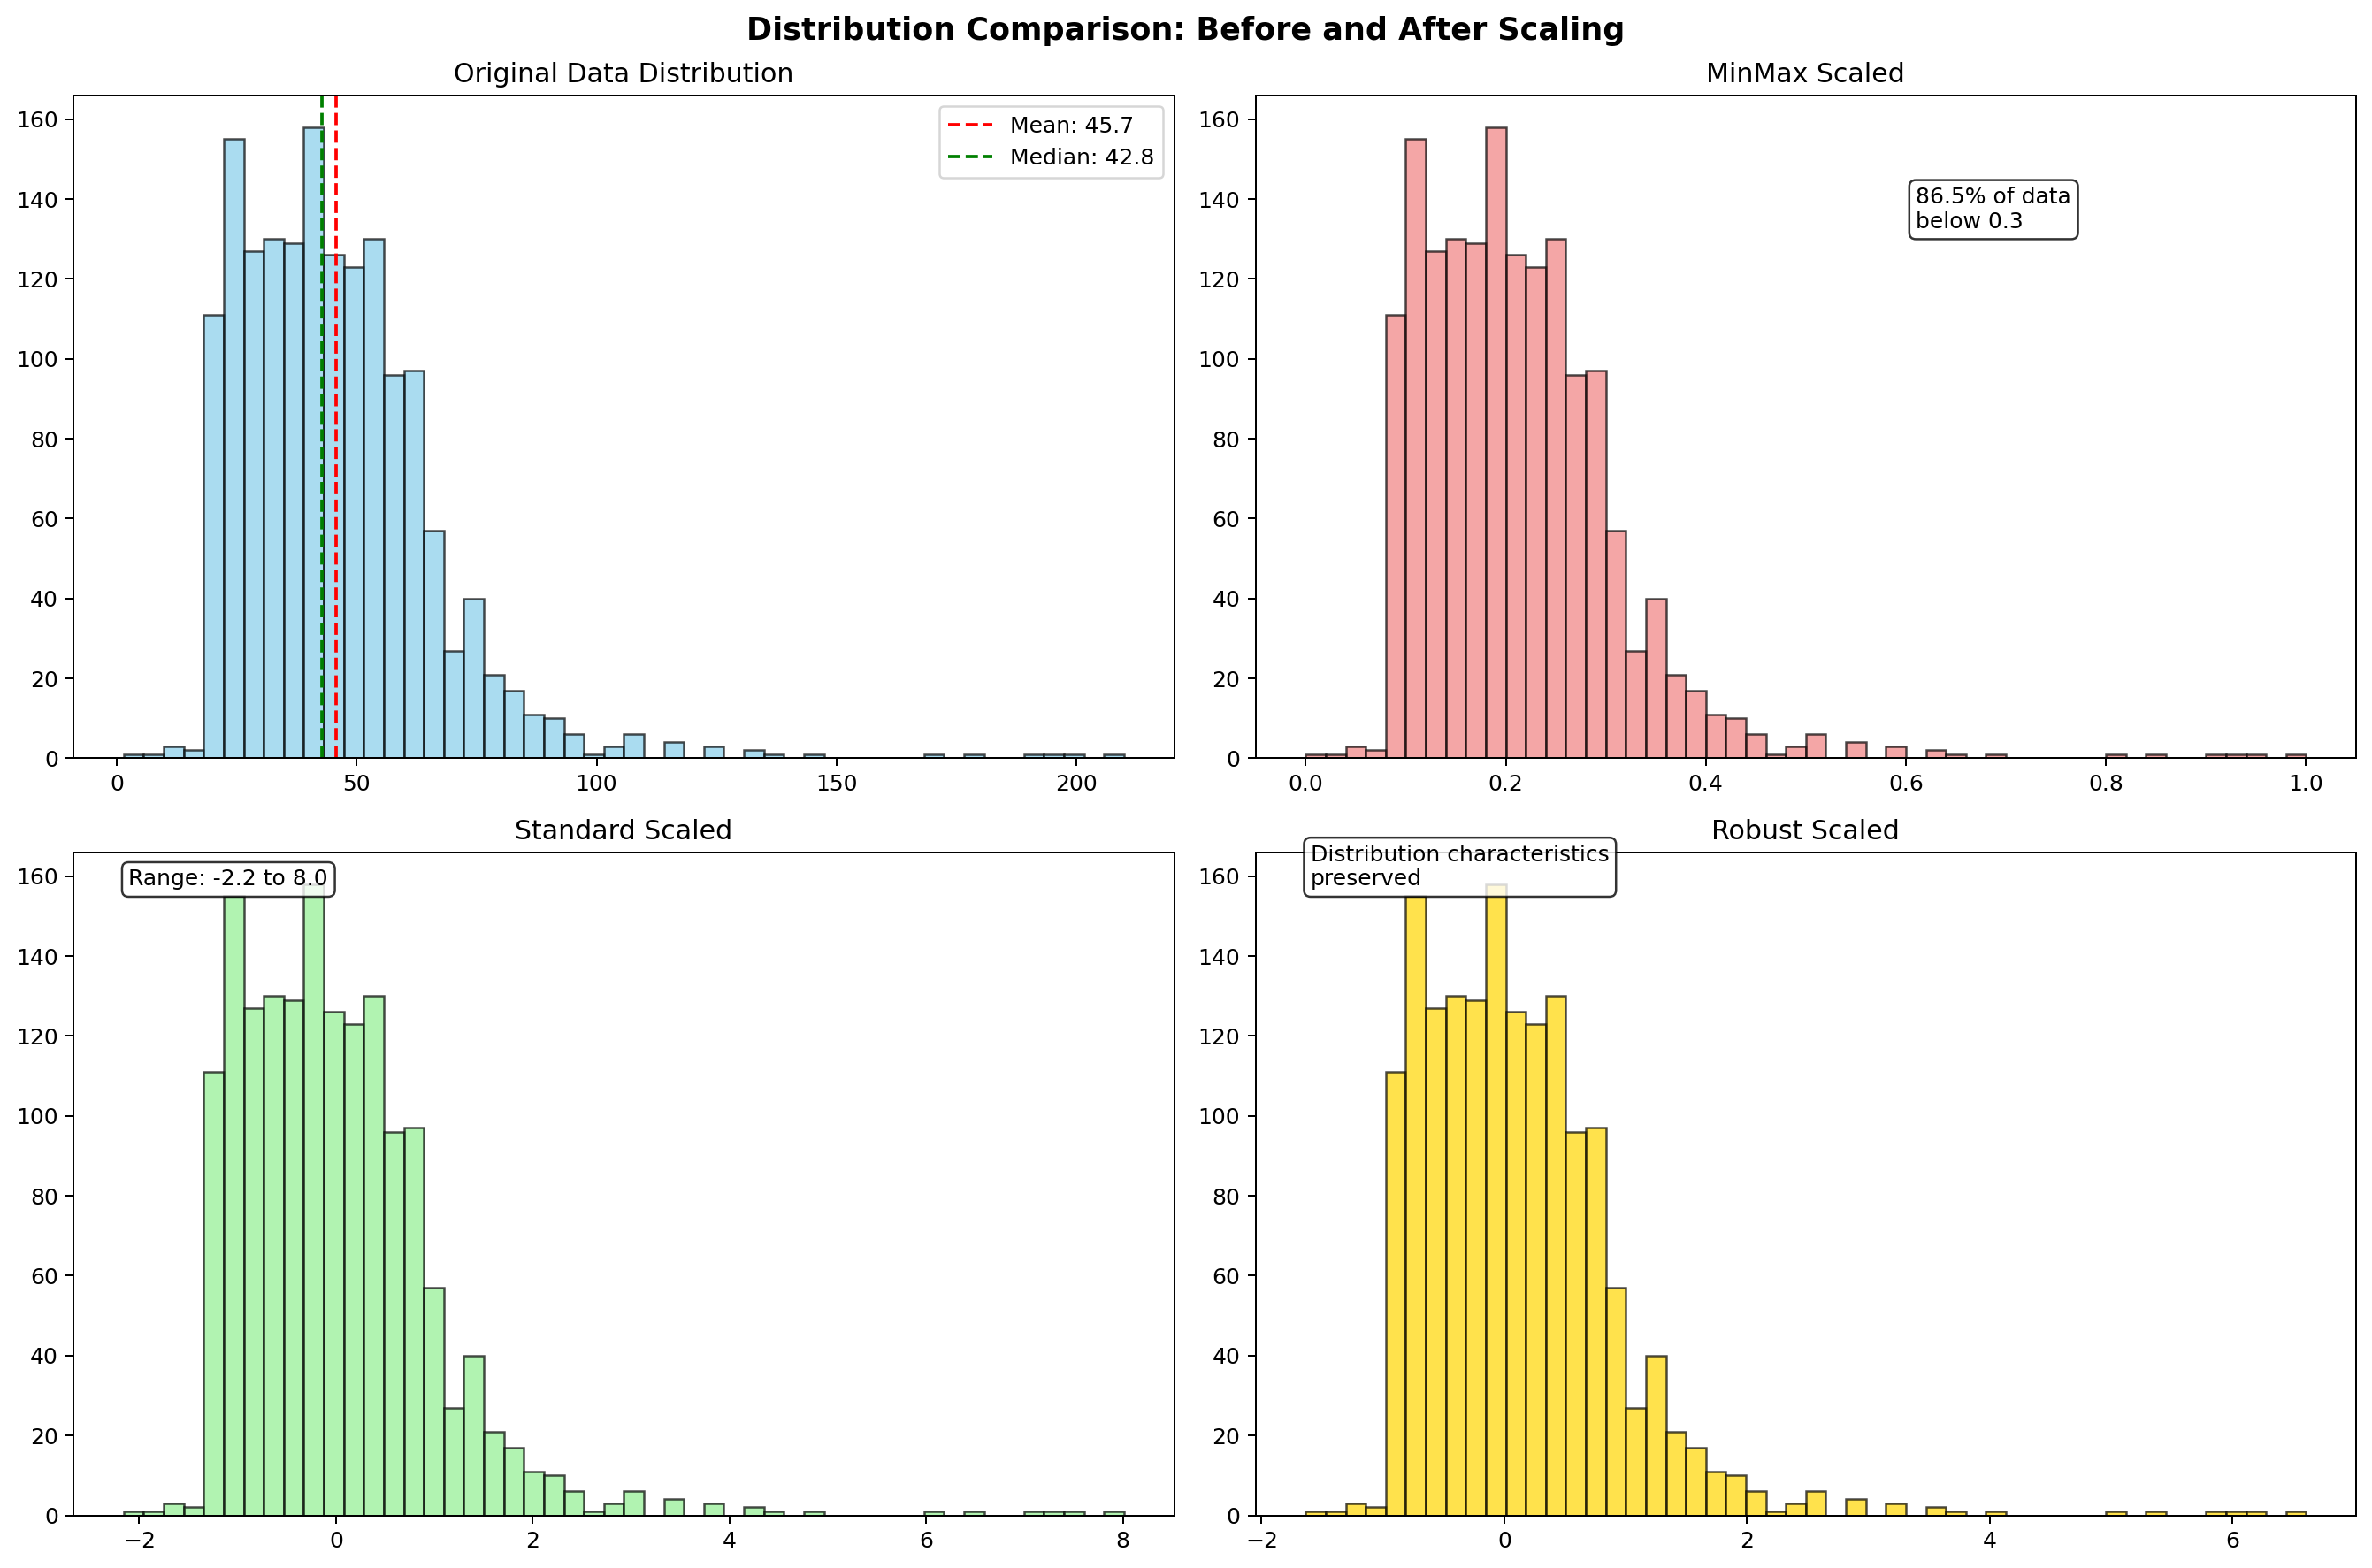

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), dpi=180)
fig.suptitle('Distribution Comparison: Before and After Scaling', fontsize=14, fontweight='bold')

# Original data
axes[0, 0].hist(df['original'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Original Data Distribution')
axes[0, 0].axvline(df['original'].mean(), color='red', linestyle='--',
                   label=f'Mean: {df["original"].mean():.1f}')
axes[0, 0].axvline(df['original'].median(), color='green', linestyle='--',
                   label=f'Median: {df["original"].median():.1f}')
axes[0, 0].legend()

# MinMax scaled - notice the compression
axes[0, 1].hist(df['MinMax'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('MinMax Scaled')
compressed_pct = (df['MinMax'] < 0.3).sum() / len(df) * 100
axes[0, 1].text(0.6, 0.8, f'{compressed_pct:.1f}% of data\nbelow 0.3',
                transform=axes[0, 1].transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Standard scaled - wide spread due to outlier influence
axes[1, 0].hist(df['Standard'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Standard Scaled')
range_text = f'Range: {df["Standard"].min():.1f} to {df["Standard"].max():.1f}'
axes[1, 0].text(0.05, 0.95, range_text, transform=axes[1, 0].transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Robust scaled - best shape preservation
axes[1, 1].hist(df['Robust'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Robust Scaled')
axes[1, 1].text(0.05, 0.95, 'Distribution characteristics\npreserved',
                transform=axes[1, 1].transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


In [ ]:
print("=== MinMaxScaler Analysis ===")
min_val = df['original'].min()
max_val = df['original'].max()
print(f"Scaling range: {min_val:.1f} to {max_val:.1f}")

# Show the compression effect
percentiles = [50, 75, 90, 95, 99]
for p in percentiles:
    pct_val = df['MinMax'].quantile(p/100)
    print(f"{p}% of data falls below: {pct_val:.3f}")

data_below_half = (df['MinMax'] < 0.5).sum() / len(df) * 100
print(f"\nResult: {data_below_half:.1f}% of data compressed below 0.5")


=== MinMaxScaler Analysis ===
Scaling range: 1.4 to 210.0
50% of data falls below: 0.199
75% of data falls below: 0.262
90% of data falls below: 0.319
95% of data falls below: 0.368
99% of data falls below: 0.541

Result: 98.6% of data compressed below 0.5


In [ ]:
print("\n=== StandardScaler Analysis ===")
mean_orig = df['original'].mean()
std_orig = df['original'].std()

# Compare with/without outliers
clean_data = df['original'][df['original'] < 150]
mean_clean = clean_data.mean()
std_clean = clean_data.std()

print(f"With outliers: mean={mean_orig:.2f}, std={std_orig:.2f}")
print(f"Without outliers: mean={mean_clean:.2f}, std={std_clean:.2f}")
print(f"Outlier impact: mean +{mean_orig - mean_clean:.2f}, std +{std_orig - std_clean:.2f}")

# Show impact on typical data points
typical_value = 50
z_with_outliers = (typical_value - mean_orig) / std_orig
z_without_outliers = (typical_value - mean_clean) / std_clean
print(f"\nZ-score for value 50:")
print(f"With outliers: {z_with_outliers:.2f}")
print(f"Without outliers: {z_without_outliers:.2f}")



=== StandardScaler Analysis ===
With outliers: mean=45.65, std=20.52
Without outliers: mean=45.11, std=18.51
Outlier impact: mean +0.54, std +2.01

Z-score for value 50:
With outliers: 0.21
Without outliers: 0.26


In [ ]:
print("\n=== RobustScaler Analysis ===")
median_orig = df['original'].median()
q25, q75 = df['original'].quantile([0.25, 0.75])
iqr = q75 - q25

# Compare with/without outliers
clean_data = df['original'][df['original'] < 150]
median_clean = clean_data.median()
q25_clean, q75_clean = clean_data.quantile([0.25, 0.75])
iqr_clean = q75_clean - q25_clean

print(f"With outliers: median={median_orig:.2f}, IQR={iqr:.2f}")
print(f"Without outliers: median={median_clean:.2f}, IQR={iqr_clean:.2f}")
print(f"Outlier impact: median {abs(median_orig - median_clean):.2f}, IQR {abs(iqr - iqr_clean):.2f}")

# Show consistency for typical data points
typical_value = 50
robust_with_outliers = (typical_value - median_orig) / iqr
robust_without_outliers = (typical_value - median_clean) / iqr_clean
print(f"\nRobust score for value 50:")
print(f"With outliers: {robust_with_outliers:.2f}")
print(f"Without outliers: {robust_without_outliers:.2f}")



=== RobustScaler Analysis ===
With outliers: median=42.81, IQR=25.31
Without outliers: median=42.80, IQR=25.08
Outlier impact: median 0.01, IQR 0.24

Robust score for value 50:
With outliers: 0.28
Without outliers: 0.29


In [ ]:
def recommend_scaler(data):
    """
    Simple scaler recommendation based on data characteristics
    """
    # Calculate key statistics
    skewness = abs(stats.skew(data))
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    outlier_threshold = q75 + 1.5 * iqr
    outlier_pct = (data > outlier_threshold).sum() / len(data) * 100

    print(f"Data analysis:")
    print(f"Skewness: {skewness:.2f}")
    print(f"Outliers: {outlier_pct:.1f}% of data")

    if outlier_pct > 5:
        return "RobustScaler - High outlier percentage"
    elif skewness > 1:
        return "RobustScaler - Highly skewed distribution"
    elif skewness < 0.5 and outlier_pct < 1:
        return "StandardScaler - Nearly normal distribution"
    else:
        return "RobustScaler - Default safe choice"

# Test on our messy data
recommendation = recommend_scaler(df['original'])
print(f"\nRecommendation: {recommendation}")


Data analysis:
Skewness: 2.07
Outliers: 2.0% of data

Recommendation: RobustScaler - Highly skewed distribution
